In [55]:
import numpy as np
import matplotlib.pyplot as plt

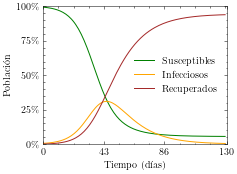

In [8]:
I = np.zeros(130)
S = np.zeros(130)
R = np.zeros(130)

i_initial = 1
N = 200

I[0] = i_initial
S[0] = N-i_initial

betta = 0.21
mu = 0.07

def variations(S, I, R, betta, mu):
    return -S*I/N*betta, S*I/N*betta - mu*I, mu*I

for t in range(len(S)-1):
    c1, c2, c3 = variations(S[t], I[t], R[t], betta, mu)

    S[t+1] = S[t] + c1
    I[t+1] = I[t] + c2
    R[t+1] = R[t] + c3

with plt.style.context('science'):
    fig = plt.figure()
    plt.plot(S, label='Susceptibles', color='green')
    plt.plot(I, label='Infecciosos', color='orange')
    plt.plot(R, label='Recuperados', color='brown')
    
    plt.xlabel("Tiempo (días)")
    plt.xticks(ticks= np.linspace(0, len(I), 4, dtype=int), labels=list(map(lambda x: f"{int(x):d}", np.linspace(0, len(I), 4))))
    plt.ylabel("Población ")
    plt.yticks(ticks= np.linspace(0, N, 5, dtype=int), labels=list(map(lambda x: f"{int(x)}\%", np.linspace(0, 1, 5)*100)))
    plt.legend()
    plt.xlim(0, len(S))
    plt.ylim(0, N)
    plt.tight_layout()
    plt.show()
    fig.savefig("images/SIR_model.pdf")

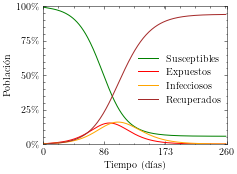

In [16]:
I = np.zeros(260)
E = np.zeros(260)
S = np.zeros(260)
R = np.zeros(260)

i_initial = 1
N = 200

I[0] = i_initial
S[0] = N-i_initial

betta = 0.21
mu = 0.07
eta = 0.08

def variations(S, E, I, R, betta, mu):
    return -S*I/N*betta, S*I/N*betta - eta*E, eta*E - mu*I, mu*I

for t in range(len(S)-1):
    c1, c2, c3, c4 = variations(S[t], E[t], I[t], R[t], betta, mu)

    S[t+1] = S[t] + c1
    E[t+1] = E[t] + c2
    I[t+1] = I[t] + c3
    R[t+1] = R[t] + c4

with plt.style.context('science'):
    fig = plt.figure()
    plt.plot(S, label='Susceptibles', color='green')
    plt.plot(E, label='Expuestos', color='red')
    plt.plot(I, label='Infecciosos', color='orange')
    plt.plot(R, label='Recuperados', color='brown')
    
    plt.xlabel("Tiempo (días)")
    plt.xticks(ticks= np.linspace(0, len(I), 4, dtype=int), labels=list(map(lambda x: f"{int(x):d}", np.linspace(0, len(I), 4))))
    plt.ylabel("Población ")
    plt.yticks(ticks= np.linspace(0, N, 5, dtype=int), labels=list(map(lambda x: f"{int(x)}\%", np.linspace(0, 1, 5)*100)))
    plt.legend(loc='center left', bbox_to_anchor=(0.47, 0.47))
    plt.xlim(0, len(S))
    plt.ylim(0, N)
    plt.tight_layout()
    plt.show()
    fig.savefig("images/SEIR_model.pdf")

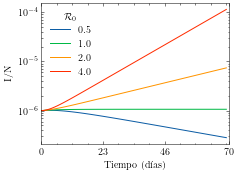

In [54]:
S = np.zeros(70)
I = np.zeros(70)
E = np.zeros(70)


R_0= [4, 2, 1, 0.5]

i_initial = 10
N = int(1e7)

S[0] = N - 2*i_initial
I[0] = i_initial
E[0] = i_initial

# betta = 0.20
mu = 0.07
eta = 0.08

def variations(S, E, I, r_0, mu, eta):
    return -r_0*I*mu, -eta*E + r_0*I*mu, eta*E - I*mu
    return -S*I/N*betta, S*I/N*betta - eta*E, eta*E - mu*I, mu*I

with plt.style.context('science'):
    fig, ax = plt.subplots()

    for r_o in reversed(R_0):
        for t in range(len(I)-1):
            c0, c1, c2 = variations(S[t], E[t], I[t], r_o, mu, eta)

            S[t+1] = S[t] + c0
            E[t+1] = E[t] + c1
            I[t+1] = I[t] + c2


    
        # plt.plot(S, label='Susceptibles', color='green')
        # plt.plot(E, label='Expuestos', color='red')
        ax.plot(I/N, label=f"{r_o:.1f}")#, color='orange')
        # plt.plot(R, label='Recuperados', color='brown')  

    ax.set_xlabel("Tiempo (días)")
    ax.set_xticks(ticks= np.linspace(0, len(I), 4, dtype=int), labels=list(map(lambda x: f"{int(x):d}", np.linspace(0, len(I), 4))))
    ax.set_ylabel("I/N")
    # ax.set_xticks(ticks=np.linspace(), labels=list(map(str, np.linspace(0, 1, 5))))
    ax.legend(title=r'$\mathcal{R}_0$')
    ax.axes.yaxis.set_ticklabels([])
    ax.set_xlim(0, len(I))
    ax.set_yscale('log')
    # ax.set_ylim(0, N)
    plt.tight_layout()
    plt.show()
    fig.savefig("images/r0_example.pdf")

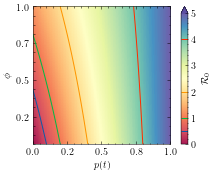

In [56]:
k_activo = 12
k_conf = 3
_lambda = 0.1
_mu = 0.24

permeabilidad = np.linspace(0,1, 50)
p_active = np.linspace(0,1, 50)


def r_0(p, perme):
    return _lambda/_mu * (p*k_activo + perme*(1-p)*k_conf)


with plt.style.context('science'):
    fig, ax = plt.subplots()

    X, Y = np.meshgrid(p_active, permeabilidad)
    R_0 = r_0(X, Y)

    cnorm = plt.Normalize(0, 5, clip=True)
    img = ax.imshow(R_0, cmap='Spectral', norm=cnorm, extent=[p_active.min(), p_active.max(), permeabilidad.min(), permeabilidad.max()], origin='lower', alpha=0.9)
    

    levels = [0.5, 1, 2, 4]

    # CS = ax.contour(X, Y, R_0, levels, colors=('b', 'g', 'orange', 'r'), origin='lower', extend='both')
    CS = ax.contour(X, Y, R_0, levels, colors=['#0C5DA5', '#00B945', '#FF9500', '#FF2C00'], origin='lower', extend='both', alpha=1)

    # ax.contourf(R_0, 1, alpha=0.4)

    cb = fig.colorbar(img, label=r"$\mathcal{R}_0$", extend='max')
    cb.add_lines(CS)


    ax.set_xlabel(r"$p(t)$")
    ax.set_ylabel(r"$\phi$")

    ax.set_xticks(ticks=np.linspace(0, 1, 5), labels=list(map(lambda x: f"{x:.1f}", np.linspace(0, 1, 5))))
    ax.set_yticks(ticks=np.linspace(1/5, 1, 4), labels=list(map(lambda x: f"{x:.1f}", np.linspace(1/5, 1, 4))))


    plt.tight_layout()
    plt.show()
    fig.savefig("images/r0_model.pdf")

C:\Users\QUANTI~1\AppData\Local\Temp/ipykernel_19020/1962999129.py:23: UserWarning: The following kwargs were not used by contour: 'shading'
  CS = ax.contour(X, Y, R_0, levels, colors=['#0C5DA5', '#00B945', '#FF9500', '#FF2C00'], origin='lower', extend='both', shading='auto')


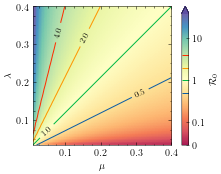

In [52]:
_lambda = np.linspace(0.01,0.4, 50)
_mu = np.linspace(0.01,0.4, 50)


def r_0(betta, mu):
    return betta/mu

import matplotlib.colors as colors

with plt.style.context('science'):
    fig, ax = plt.subplots()

    X, Y = np.meshgrid(_mu, _lambda)
    R_0 = r_0(Y, X)

    # norm=colors.SymLogNorm(vmin=R_0.min(), vmax=R_0.max())
    norm=colors.SymLogNorm(linthresh=0.1, linscale=0.5, vmin=0, vmax=R_0.max())

    img = ax.imshow(R_0, norm=norm, cmap='Spectral', extent=[_mu.min(), _mu.max(), _lambda.min(), _lambda.max()], origin='lower', alpha=0.9)

    levels = [0.5, 1, 2, 4]

    CS = ax.contour(X, Y, R_0, levels, colors=['#0C5DA5', '#00B945', '#FF9500', '#FF2C00'], origin='lower', extend='both', shading='auto')

    # ax.contourf(R_0, 1, alpha=0.4)


    

    cb = fig.colorbar(img, label=r"$\mathcal{R}_0$", norm=norm, extend='max')
    cb.add_lines(CS)
    cb.ax.set_yticks([0, 0.1, 1, 10], ["0", "0.1", "1", "10"])
    # cb.ax.set_xticks([0.01, 0.5, 1, 2, 4, 10])
    ax.clabel(CS, fmt='%2.1f', colors='black', fontsize=8)

    ax.set_ylabel(r"$\lambda$")
    ax.set_xlabel(r"$\mu$")

    ax.set_xticks(ticks=np.linspace(_mu.min()/5, _mu.max(), 5), labels=list(map(lambda x: f"{x:.1f}", np.linspace(_mu.min()/5, _mu.max(), 5))))
    ax.set_yticks(ticks=np.linspace(_lambda.max()/5, _lambda.max(), 4), labels=list(map(lambda x: f"{x:.1f}", np.linspace(_lambda.max()/5, _lambda.max(), 4))))

    ax.set_ylim(_lambda.min(), _lambda.max())
    ax.set_xlim(_mu.min(), _mu.max())
    plt.tight_layout()
    plt.show()
    fig.savefig("images/r0_sir_seir.pdf")